<a href="https://colab.research.google.com/github/marioc1904/Algoritmos2021/blob/master/trabajo_isotermico_reversible_y_no_isotermico_reversible.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio: Expansión de un gas
El trabajo realizado ( W ) por la expansión isotérmica reversible de un gas ideal es  W=−nRTlnVfVi , donde  n  son moles,  R  la constante universal de los gases igual  8.314Jmol⋅K ,  T  la temperatura en Kelvin,  Vi  y  Vf  volumen inicial y final en  m3 , respectivamente. Suponga ahora que la expansión es reversible pero no-isotérmica y que la temperatura disminuye a medida que avanza la expansión. (a) Encuentre una expresión para el trabajo cuando  T=Ti−c(V−Vi) , con  c  una constante positiva en  K/m3 , y  V  el volumen variable en  m3 . (b) ¿El trabajo es mayor o menor que para la expansión isotérmica?

Fuente: Ejercicio 1.12 del libro Physical Chemistry for the Life Sciences de Peter Atkins y Julio de Paula.

In [ ]:
# Importamos el paquete sympy para usar la funciones integrate, symbols y Symbol.

from sympy import *
# init_printing(use_unicode=False, wrap_line=False)

# Definición de variables simbólicas usando la función symbols()
c, n, R, Ti, T, Vi, Vf, V, p = symbols('c, n, R, Ti, T, Vi, Vf, V, p')

# Ecuaciones en orden de relevancia
T = Ti - c*(V-Vi)     # para la expansión no-isotérmica reversible, Ti constante
p1 = (n*R*Ti)/V       # expansión isotérmica reversible, Ti constante.
p2 = (n*R*T)/V        # expansión no-isotérmica reversible

# Integramos para cada caso usando la función integrate() y guardamos cada resultado en una variable
# dW = -pdV

# Forma indefinida
result1 = integrate(-p1, (V, Vi, Vf))
result2 = integrate(-p2, (V, Vi, Vf))

print("Integrales indefinidas")
print("W1 =", result1)
print("W2 =", result2)

# Forma indefinida general
resgel1 = integrate(-p1, (V, Vi, V))
resgel2 = integrate(-p2, (V, Vi, V))

print("")
print("Integrales indefinidas, forma general, con V indicado")
print("W1 =", resgel1)
print("W2 =", resgel2)

Integrales indefinidas
W1 = -R*Ti*n*log(Vf) + R*Ti*n*log(Vi)
W2 = R*Vf*c*n - R*Vi*c*n - R*n*(Ti + Vi*c)*log(Vf) + R*n*(Ti + Vi*c)*log(Vi)

Integrales indefinidas, forma general, con V indicado
W1 = -R*Ti*n*log(V) + R*Ti*n*log(Vi)
W2 = R*V*c*n - R*Vi*c*n - R*n*(Ti + Vi*c)*log(V) + R*n*(Ti + Vi*c)*log(Vi)


In [ ]:

c = 5               # en K/m^3. Constante.
n = 3               # en mol. Cantidad de Sustancia
R = 8.314             # en J/(mol K). Constante universal de los gases
Ti = 313.15           # en K. Equivale a 40ºC. Temperatura inicial
Vi = 8              # en m^3. Volumen inicial
Vf = 13               # en m^3. Volumen final
 
# Ecuaciones en orden de relevancia
T = Ti - c*(V-Vi)     # para la expansión no-isotérmica reversible, Ti constante
p1 = (n*R*Ti)/V       # expansión isotérmica reversible, Ti constante.
p2 = (n*R*T)/V        # expansión no-isotérmica reversible

# Definimos al volumen V como variable usando la función Symbol()
V = Symbol('V')

# Calculamos las integrales definidas
defint1 = integrate(p1, (V, Vi, Vf))
defint2 = integrate(p2, (V, Vi, Vf))

print("")
print("Integrales definidas")
print(defint1)
print(defint2)

# ¿El trabajo no-isotérmico reversible es mayor que el de la expansión isotérmica reversible?
# Usamos lógica del programa (True: cumple, False: no cumple)
logica = defint1 > defint2
print("")
print("¿El trabajo no-isotérmico reversible es mayor que el de la expansión isotérmica reversible?")
if logica == True:
  print("Sí")
else:
  print("No")



Integrales definidas
-7810.5873*log(8) + 7810.5873*log(13)
-8808.2673*log(8) - 623.55 + 8808.2673*log(13)

¿El trabajo no-isotérmico reversible es mayor que el de la expansión isotérmica reversible?
Sí


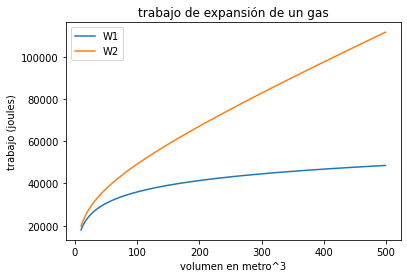

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

c = 5              
n = 3               
R = 8.314            
Ti = 313.15          
Vi = 1  



V = np.arange(10,500)

W1 = R*Ti*n*np.log(V) - R*Ti*n*np.log(Vi)
W2 = R*V*c*n + R*Vi*c*n + R*n*(Ti + Vi*c)*np.log(V) - R*n*(Ti + Vi*c)*np.log(Vi)

plt.plot(V, W1, label='W1')
plt.plot(V, W2, label='W2')

plt.xlabel('volumen en metro^3')
plt.ylabel('trabajo (joules)')

plt.title('trabajo de expansión de un gas')
plt.legend()
plt.show()